# 

In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
from matplotlib import pyplot as plt 
import numpy as np

C:\Users\jyoth\AppData\Local\Temp\ipykernel_12976\775073371.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


# LOAD DATA

In [3]:
train_data = tf.keras.utils.image_dataset_from_directory('./data/train',
                                                      image_size = (48, 48),
                                                      shuffle = True,
                                                      batch_size = 64,
                                                      color_mode = 'grayscale')

val_data = tf.keras.utils.image_dataset_from_directory('./data/test',
                                                      image_size = (48, 48),
                                                      shuffle = True,
                                                      batch_size = 64,
                                                      color_mode = 'grayscale')
data_iterate = train_data.as_numpy_iterator()
batch = data_iterate.next()

Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [4]:
train = train_data.map(lambda x,y: (x/255, y))
validation = val_data.map(lambda x,y: (x/255, y))

In [ ]:
#get_data.as_numpy_iterator().next()

# Split Data

In [5]:
train_size = int(len(train_data)*.8)
val_size = int(len(train_data)*.2)+1

In [6]:
train = train_data.take(train_size)
validation = train_data.skip(train_size).take(val_size)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam

In [15]:
model = Sequential()

model.add(Conv2D(64, (3, 3), 1, activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(34, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dense(len(train_data), activation='softmax'))


In [16]:
model.compile('adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
model.summary()

In [17]:
logdir = 'new_logs'

In [18]:
tb_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [19]:
history = model.fit(train, epochs=50, validation_data=validation, callbacks=[tb_callback])

Epoch 1/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 29s 78ms/step - accuracy: 0.2548 - loss: 3.0484 - val_accuracy: 0.3578 - val_loss: 1.6563
Epoch 2/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 28s 78ms/step - accuracy: 0.3675 - loss: 1.6258 - val_accuracy: 0.3932 - val_loss: 1.5622
Epoch 3/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 29s 80ms/step - accuracy: 0.4002 - loss: 1.5398 - val_accuracy: 0.4085 - val_loss: 1.5462
Epoch 4/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 28s 78ms/step - accuracy: 0.4215 - loss: 1.4874 - val_accuracy: 0.4282 - val_loss: 1.4708
Epoch 5/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 28s 78ms/step - accuracy: 0.4437 - loss: 1.4325 - val_accuracy: 0.4349 - val_loss: 1.4806
Epoch 6/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 28s 78ms/step - accuracy: 0.4582 - loss: 1.3978 - val_accuracy: 0.4450 - val_loss: 1.4455
Epoch 7/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 28s 78ms/step - accuracy: 0.4775 - loss: 1.3532 - val_accuracy: 0.4591 - val_loss: 1.4414
Epoch 8/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 29s 79ms/step - accuracy: 0.4979 - loss: 1.3055 - 

In [20]:
model_json = model.to_json()
with open('gray_model_jsonfile.json', 'w') as jf:
    jf.write(model_json)
model.save_weights('gray_model.weights.h5')

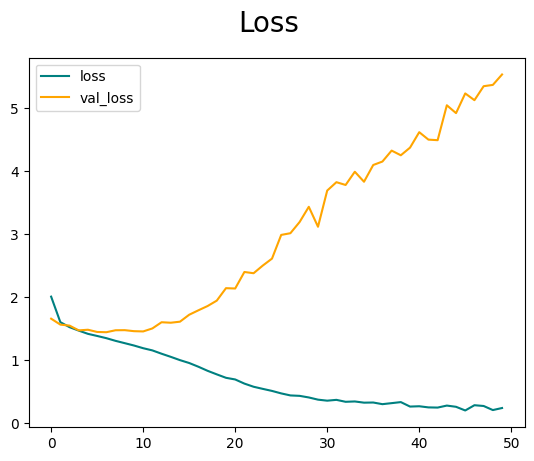

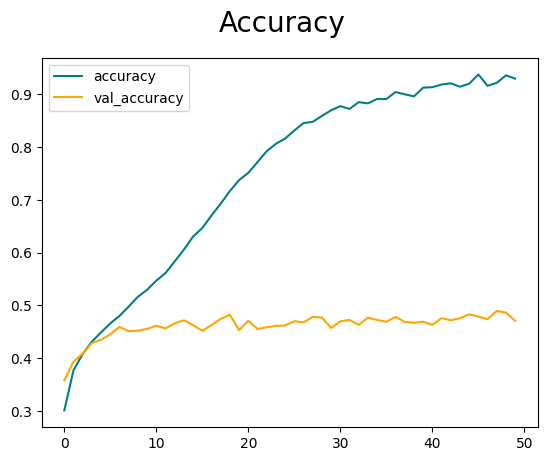

In [21]:
fig = plt.figure()
plt.plot(history.history['loss'],color='teal',label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

fig = plt.figure()
plt.plot(history.history['accuracy'],color='teal',label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()